<a href="https://colab.research.google.com/github/dudushi/CLA23-24/blob/main/HWFREE_modified.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| Student          | ID | mail |
| :---------------- | :------: | ----: |
| Kevin Elezi        |  s316685   | kevin.elezi@studenti.polito.it|
| Suyash Singh          |   s307798   | suyash.singh@studenti.polito.it |


# 1. $\text{Homework Free}$
 Implementing the _**Inverse Power**_ and _**Deflation Methods**_ to determine the lowest $M$ eigenvalues for a symmetric matrix.

Importing the necessary libraries
the only library that we used in this notebook is **numpy**

In [2]:
import numpy as np

In [3]:
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings for cleaner output

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



To test our program, we've made a **symmetric and invertible matrix** $A ∈ ℝ^{5x5}$ with $λ \neq 0$.<br>
This setup helps us check if our method for finding eigenvalues, specifically the smallest one, works as intended. <br>
 Alongside, we've prepared an initial guess for both the **eigenvector** $x_0$ and **eigenvalue** $λ_0$, which are crucial for starting the process of the Inverse Power Method, a technique used to find the **specific** eigenvalue we're interested in. This preparation ensures our method has a solid starting point for accurate and efficient computations. <br>

 <br>

 We added the diagonal dominance. More precisely, the matrix $A$ is diagonally  dominant if :

<br>

$$| a _{i i} | ≥ ∑_{j ≠ i} | a _{i j} | \quad ∀ i $$ <br>

We know that the $A$ strictly diagonally dominant matrix is **invertible**.

In [4]:
np.random.seed(min(316665,307798))

# Size of the matrix
size = 5

# Generate a random matrix
matrix = np.random.rand(size, size)

# Make the matrix symmetric
matrix = (matrix + matrix.T) / 2

# Add diagonal dominance
diagonal = np.diag(np.sum(np.abs(matrix), axis=1))
matrix = matrix + diagonal

# Add positive definiteness
eigenvalues, eigenvectors = np.linalg.eig(matrix)
min_eigenvalue = np.min(eigenvalues)
matrix = matrix + np.eye(size) * (abs(min_eigenvalue) + 1)

# 2. **Shifted** Inverse Power Method

In the following cell, we have implemented the **Shifted** Inverse Power Method. <br>
This method ensures that given an $α$ value of our choice, we are able to find the closest eigenvalue $λ$ of $A$ to $α$. <br>
Knowing that : <br>
$$Ax = λx$$ <br>
$$(A-αI)x = (λ-α)x$$ <br>
$$\frac{x}{λ-α} = \frac{(A-αI)^{-1}(λ-α)x}{λ-α}$$ <br>
$$(A-αI)^{-1}x = \frac{1}{λ-α}x$$ <br>


If $λ$ is an eigenvalue of $A$, $x$ is the eigenvector corresponding the eigenvalue $(λ- α)$ of the matrix $(A-αI)$.<br> We want to compute the closest eigenvalue to $α$ making $(λ- α)$ as small as possibile $⇒$ Inverse Power Method. <br>
In this way we can find the eigenvalue $λ$ (closest to $α$) since the truer the relationship $λ \sim  α$ is, the more the eigenvalue $\frac{1}{λ- α}$of the matrix $(A-αI)^{-1}$ will become the largest in term of magnitude.
 <br>

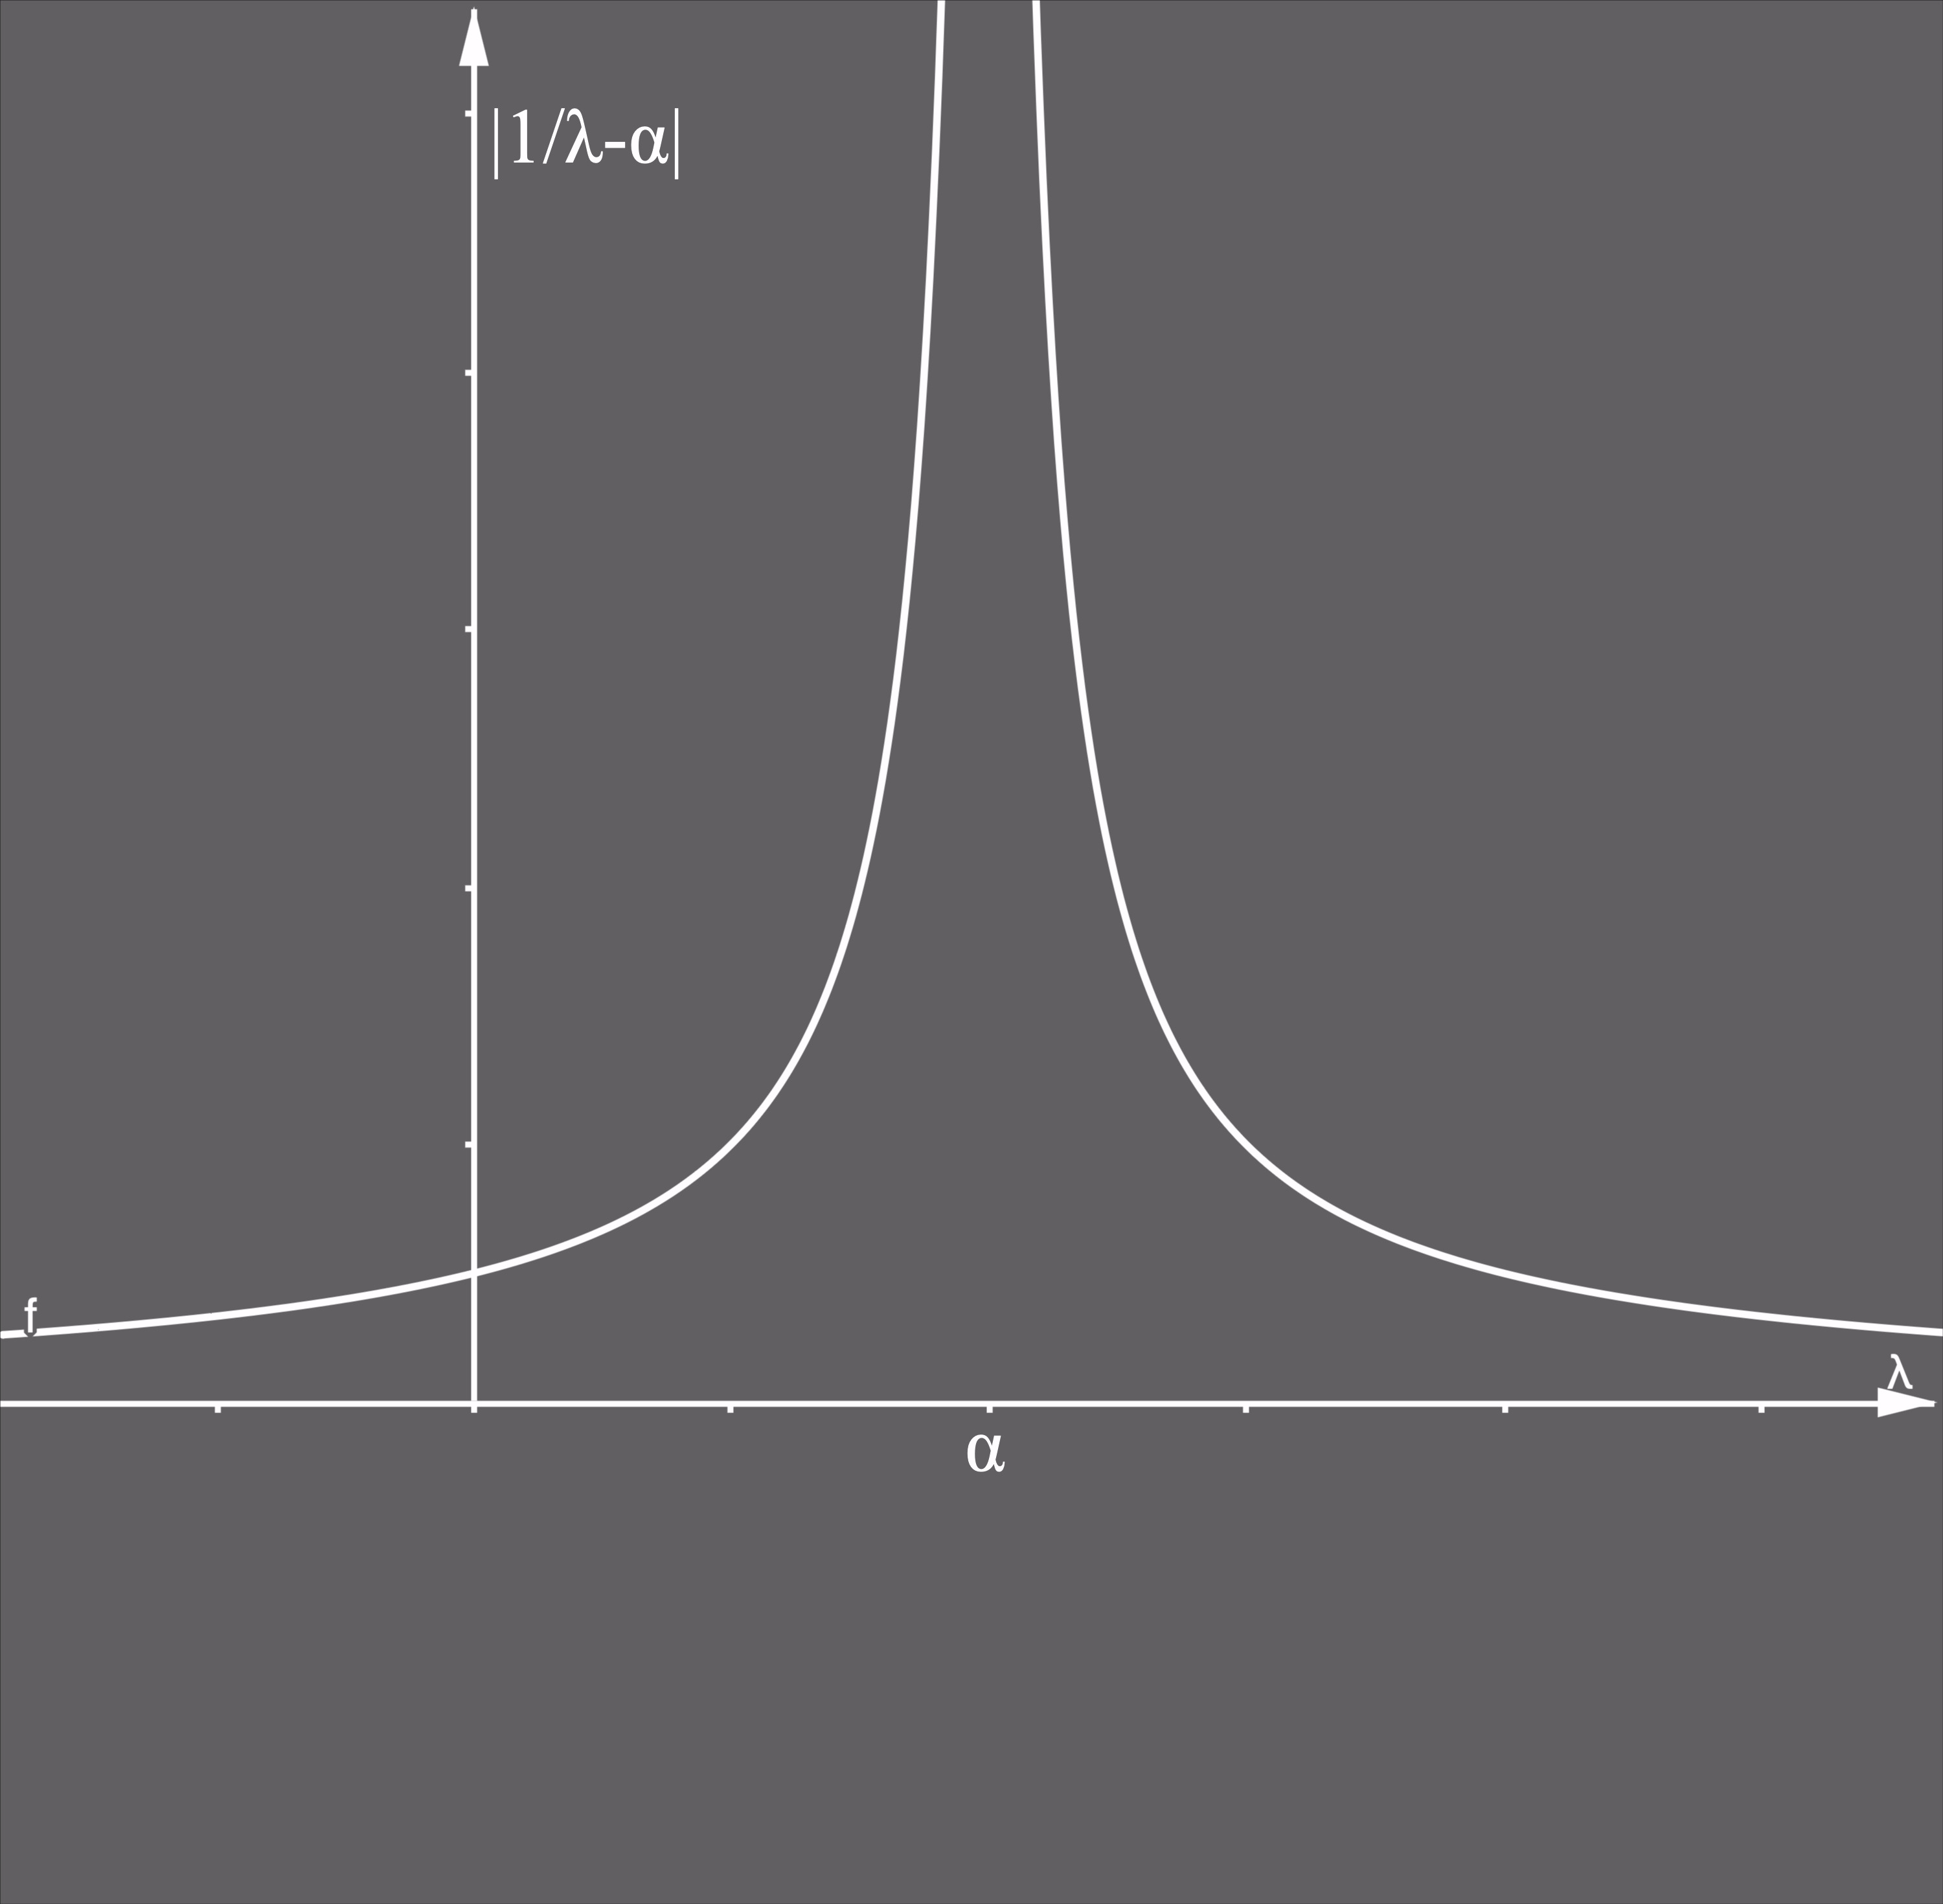

In [5]:
# @title
from IPython.display import Image
Image(filename='/content/drive/MyDrive/1_HMs_comptuational/HM3/porr.png', width=600)

The method takes as input :
- matrix $A$
- initial **eigenvector** $x_0$
- initial **eigenvalue** $λ_0$,
- number of iterations $MaxIter$
- tolerance $τ$ <br>

The method returns the final and smallest eigenvalue $(λ - α)$  and the corresponding eigenvector $x$. Knowing that : <br>
<br>

$$| λ_1| ≥ | λ_2| ≥ . . . ≥ | λ_i| ≥  α  ≥  | λ_{i+1}|≥...≥| λ_{n-1}| ≥ | λ_{n}|$$ <br>
Where $$ λ =\
\begin{cases}
    λ_i  & \text{if} \quad (λ_i - α) < (λ_{i+1} - α) \\
    λ_{i+1} & \text{if} \quad (λ_i - α) > (λ_{i+1} - α) \\
\end{cases} $$
<br>
**Shifted** Inverse Power Method: <br>
$v_0  ≠ 0,\quad  v^{old} = \frac{v_o}{||v_0||}, \quad  σ = \frac{1}{λ - α} $ <br>
$do $
1. $ v^{new} = (A-αI)^{-1}v^{old} → \text{LU decompositzion}$
1. $ v^{new} = \frac{v^{new}}{||v^{new}||}$
1. $ λ^{new} = \frac{λ^TAλ}{λ^Tλ} → \text{Rayleigh Quotient}$
1. $ λ^{old} =  λ^{new}$
2. $ v^{old} = v^{new}$
1. $k++$
1. $while$ $(k < MaxIter \land \frac{|λ^{new}-λ^{old}|}{|λ^{new}|}>τ )$ <br>
return $\lambda$
<br>


The method works as follows:
It begins by taking the size of the matrix.
The eigenvalue and eigenvector variables are initialized to default values of _0.0_ and _None_, respectively. <br>
The algorithm enters a loop that runs for a maximum of max_iterations times.
Inside the loop, it attempts to solve the linear system using matrix inversion. It calculates the inverse of the matrix by subtracting the target eigenvalue multiplied by the identity matrix. <br>
As suggested in lecture , we will use **LU decomposition** to find : <br>

$$v^{new} = (A-αI)^{-1}v^{old} ⟶ (A-αI)v^{new} = v^{old}$$ <br>
In this way we will decrease the computational effort required each time we want to calculate the new eigenvector $v^{new}$.<br>
If the matrix is **singular** and cannot be inverted, a **LinAlgError** is caught, and the method returns None value for both the eigenvalue and eigenvector. <br>
If the linear system is solvable, the algorithm computes the next eigenvector approximation.<br>
The next eigenvector is then normalized to ensure it has unit length using **np.linalg.norm.** <br>
To approximate the eigenvalue, the algorithm computes through the **Rayleigh Quotient** the eigenvalue $λ^{new}$.<br>
The algorithm checks for **convergence by comparing the absolute difference between the new eigenvalue** approximation and the previous eigenvalue with the specified tolerance $τ$. If the **difference is below the tolerance, the algorithm considers the iteration converged and breaks out of the loop.**<br>
If **convergence is not achieved, the eigenvalue and eigenvector are updated with the new values, and the algorithm proceeds to the next iteration.**
The initial eigenvector is **updated with the next eigenvector for the next iteration.**<br>
Finally, when the algorithm terminates (either due to convergence or reaching the maximum iterations), it returns the converged eigenvalue and eigenvector.

In [6]:
def rayleigh_quotient(matrix, vector):
    numerator = np.dot(vector.T, np.dot(matrix, vector))
    denominator = np.dot(vector.T, vector)
    return numerator / denominator

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import lu_factor,lu_solve
def inverse_power_method(matrix, initial_eigenvector , alpha, max_iterations=100, tolerance=1e-6):
    n = matrix.shape[0]

    eigenvalue = 0.0  # to initialize eigenvalue with a default value
    eigenvector = None
    lambda_values = []  # List to store the computed eigenvalues

    for iteration in range(max_iterations):

        # Solving the linear system using LU decomposition
        try:
            lu, piv = lu_factor(matrix - alpha * np.eye(n))

            # Solve L * y = v_old
            y = lu_solve((lu, piv), initial_eigenvector)

            # Solve U * x = y
            next_vector = lu_solve((lu, piv), y)

        except np.linalg.LinAlgError:
            print("Matrix is singular. Inverse power method failed.")
            return None, None

        # Normalizing the next vector
        next_vector /= np.linalg.norm(next_vector)

        # Compute the eigenvalue approximation
        eigenvalue_next = rayleigh_quotient(matrix, next_vector)

        # Checking for convergence
        if np.abs(eigenvalue_next - eigenvalue) < tolerance:
            eigenvalue = eigenvalue_next
            eigenvector = next_vector
            break

        # Updating the eigenvalue and eigenvector
        eigenvalue = eigenvalue_next
        eigenvector = next_vector

        # Update the initial vector for the next iteration
        initial_eigenvector = next_vector

        # Store the computed eigenvalue
        lambda_values.append(eigenvalue)

    return eigenvalue, eigenvector


In [8]:
# Generate a random initial eigenvector
initial_eigenvector = np.random.rand(size)

# Normalize the initial eigenvector
initial_eigenvector = initial_eigenvector / np.linalg.norm(initial_eigenvector)

print('Initial eigenvector :', initial_eigenvector)

Initial eigenvector : [0.60265916 0.65217018 0.01737863 0.43150893 0.1580317 ]


In [9]:
#using the inverse power method to find the smallest eigenvalue
eigenvalue, eigenvector = inverse_power_method(matrix, initial_eigenvector, 4.2)
print("Eigenvalue:", eigenvalue)

Eigenvalue: 4.659995842026454


In [10]:
eigenvalues, eigenvectors = np.linalg.eigh(matrix)
print("Eigenvalues:", eigenvalues)

Eigenvalues: [3.19361117 3.7137999  4.65999953 4.95290266 6.72487503]


Therefore **np.linalg.eigh** function from NumPy to find all eigenvalues and their corresponding eigenvectors for a matrix, aiming to **verify the accuracy of our inverse power method**. After running this function, it prints out the eigenvalues, allowing us to compare these results with those obtained from our custom implementation to ensure they match up correctly.

As you can see, the eigenvalue $λ_{SIPM}$ coming from the Shifted Inverse Power Method is almost identical to the true (and nearest to $α$) eigenvalue $λ$ of the $A$ matrix :  <br>

<br>
$$|λ_{SIPM} - λ| ≈ -3.687e^{-6} $$

$$**************************************************************************************************$$

# 3. Deflation Method

Suppose we have found the largest eigenvalue of the matrix $A$ with the power iiteration method, how do we find the second largest eigenvalue? One solution is, after finding the largest eigenvalue $\lambda_1$, to make it into the smallest by deflation and then go on to find the new largest one, let say $\lambda_2$.
<br> <br>

Deflation is a straightforward approach.
Essentially, this is what we do:
1. First, we use the Power Method to find the largest eigenvalue and eigenvector of matrix $A$.
2. Multiply the largest eigenvector $\mathbf{x}_1$ by its transpose and then by the largest eigenvalue $\lambda_1$. This
produces the matrix $Z^{*} = \lambda_1\mathbf{x}_1\mathbf{x}_1^T$
3. Compute a new matrix $A^* = A - Z^{*} = A - \lambda_1\mathbf{x}_1\mathbf{x}_1^T$.
4. Apply the Power Method to $A^*$ to compute its largest eigenvalue $λ_2$. This in turns should be the
second largest eigenvalue of the initial matrix $A$. <br> <br>

Consider: <br> <br>

$$\left(A-\lambda_1\mathbf{x}_1\mathbf{x}_1^T\right)\mathbf{x}_j=A\mathbf{x}_j-\lambda_1\mathbf{x}_1\mathbf{x}_1^T\mathbf{x}_j=\lambda_j\mathbf{x}_j-\lambda_1\mathbf{x}_1\left(\mathbf{x}_1^T\mathbf{x}_j\right)$$$$\text{If $j=1$ then:} \qquad \left(A-\lambda_1\mathbf{x}_1\mathbf{x}_1^T\right)\mathbf{x}_j=\lambda_1\mathbf{x}_1-\lambda_1\mathbf{x}_1\left(\mathbf{x}_1^T\mathbf{x}_1\right) = 0\mathbf{x}_1$$$$\text{If $j\neq1$ then:} \qquad \left(A-\lambda_1\mathbf{x}_1\mathbf{x}_1^T\right)\mathbf{x}_j=\lambda_j\mathbf{x}_j-\lambda_1\mathbf{x}_1\left(0\right) = \lambda_j\mathbf{x}_j$$ <br>

thus, $\left(A-\lambda_1\mathbf{x}_1\mathbf{x}_1^T\right) = A^*$ has the same eigenvectors as $A$ and the same eigenvalues as $A$ except that the largest one has been replaced by $0$. Thus we can use the power method to find the next biggest one $\lambda_2$ and so on... <br>

<br>

Let's now see why this method works: <br><br>
The method of deflation proceeds by finding the largest eigenvalue by iteration, then reducing the  $(n×n)$ matrix to an $(n−1)×(n−1)$
  matrix, finding the largest eigenvalue of this matrix, reducing the matrix to an  $(n−2)×(n−2)$
  matrix, and so on. <br>
  <br>

Let  $A$
  be an  $n×n$
  matrix with largest eigenvalue  $λ_1$
  and associated eigenvector  $x_1$. <br>
If  $x_1$ does not have $1$ as the component of largest modulus, multiply  $x_1$ by a **permutation matrix**  $P$ which interchanges the largest element and the first element. Suppose  $Px_1=x^{'}_{1}$. <br>
We must find an elementary matrix  $R$ such that $Rx^{'}_{1}=e_1$, the elementary vector with first component $1$ and all other components $0$. <br>
<br>
Let : $$B=RPAP^{−1}R^{−1}=RPAPR^{−1} $$ <br>

Then : $$Be_1=RPAPR^{−1}e_1=RPAPx^{'}_{1}=RPAx_1=λ_1RPx_1=λ_1e_1$$ <br>
<br>
Thus  $e_1$ is an eigenvector of  $B$ with eigenvalue  $λ_1$ and  $B$ must be upper triangular with  $λ_1$ as the first element on the leading diagonal. <br>
<br>
$$  B =
  \left[ {\begin{array}{cccc}
    λ_1 & \cdots & x_1\\
    \vdots & \ddots & \vdots\\
    0 & \cdots & x_n\\
  \end{array} } \right]
$$
<br>

Delete the first column and row to give an  $(n−1)×(n−1)$ matrix  $B_1$.<br> $A,B$
  are similar so have the same eigenvalues  $λ_1,λ_2,λ_3,...,λ_n$. <br>
The eigenvalues  $λ_2,λ_3,...,λ_n$ are eigenvalues of the  $(n−1)×(n−1)$ matrix  $B_1$. <br> <br>

Let us now try to apply it : <br>


In [11]:
def power_method(matrix, tolerance, max_iterations):
    # Step 1: Initialize a random vector
    n = matrix.shape[0]
    x_k = np.random.rand(n)

    for _ in range(max_iterations):
        # Step 2: Compute y = A * x_k
        y = np.dot(matrix, x_k)

        # Step 3: Normalize the vector
        x_k1 = y / np.linalg.norm(y)

        # Step 4: Check convergence
        if np.linalg.norm(x_k1 - x_k) < tolerance:
            break

        x_k = x_k1

    # Compute the dominant eigenvalue
    eigenvalue = np.dot(x_k, np.dot(matrix, x_k)) / np.dot(x_k, x_k)

    return eigenvalue, x_k


In [12]:
import numpy as np

# Deflation method for updating the matrix to find subsequent eigenvalues
def deflation(matrix, eigenvalue, eigenvector):
    # Create a copy of the input matrix to avoid modifying the original
    matrix_copy = np.copy(matrix)

    # Get the size of the matrix
    size = matrix_copy.shape[0]

    # Ensure the eigenvector is a numpy array for matrix operations
    eigenvector = np.array(eigenvector)

    # Compute the outer product of the eigenvector with itself
    Z = eigenvalue * np.outer(eigenvector, eigenvector.T)

    # Perform the deflation by subtracting the outer product scaled by the eigenvalue from the matrix
    matrix_copy -= Z

    # Remove the first row and column to reduce the matrix size for further eigenvalue computations
    matrix_copy = np.delete(matrix_copy, 0, axis=0)
    matrix_copy = np.delete(matrix_copy, 0, axis=1)

    return matrix_copy



In [13]:
def deflation_method(matrix, tolerance=1e-6, max_iterations=1000):
    eigenvalues = []
    matrices = []
    d_count = 0

    while True:
        eigvalue, eigvector = power_method(matrix, tolerance, max_iterations)
        eigenvalues.append(eigvalue)
        matrices.append(matrix)

        if matrix.shape[0] == 1:
            break

        matrix = deflation(matrix, eigvalue, eigvector)

        print('--------------------------------------------------------------------')
        if d_count == 0 :
            print(f'The largest eigenvalue for the original matrix is: {eigvalue}')
        else :
            print(f'The largest eigenvalue for the {d_count}-deflated matrix is: {eigvalue}')
        d_count += 1

        print('--------------------------------------------------------------------')


    for i, mat in enumerate(matrices):
        plt.subplot(1, len(matrices), i+1)
        plt.imshow(mat)
        plt.title(f'matrix{i+1}')
        plt.axis('off')

    plt.show()

    return eigenvalues

--------------------------------------------------------------------
The largest eigenvalue for the original matrix is: 6.724875034408807
--------------------------------------------------------------------
--------------------------------------------------------------------
The largest eigenvalue for the 1-deflated matrix is: 4.941522582423315
--------------------------------------------------------------------
--------------------------------------------------------------------
The largest eigenvalue for the 2-deflated matrix is: 4.533326869338119
--------------------------------------------------------------------
--------------------------------------------------------------------
The largest eigenvalue for the 3-deflated matrix is: 0.5666498122152445
--------------------------------------------------------------------


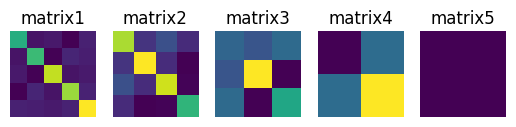

In [14]:
eigvalues = deflation_method(matrix,  tolerance=1e-6, max_iterations=1000)

In [15]:
print("Eigenvalues of the original matrix:", eigenvalues)

Eigenvalues of the original matrix: [3.19361117 3.7137999  4.65999953 4.95290266 6.72487503]


We can use deflation to find subsequent eigenvector-eigenvalue pairs, but there is a point wherein rounding error reduces the accuracy below acceptable limits.
As you can see from the fourth largest eigenvalue $λ_4$ there begins to be an error that cannot be underestimated at all : $0.566$ vs $3.713$.<br>
For this reason
other methods, are preferred when one needs to compute many or
all eigenvalues of a matrix. <br>
The peril is that deflation is numerically unstable, and repeated applications can lead to
disaster. Using it to get $λ_2$ is usually fine except for ill-behaved eigen-problems, but it is
**not advisable to use it to find all the eigenvalues.** <br>
<br>
Here is an another (and maybe more general) extreme example where there trouble can be find. Let <br>
<br>

$$A = λ_1 𝙫_1𝙫_1^T + λ_2 𝙫_2𝙫_2^T $$
<br>
where $𝙫_1^T𝙫_1 = 𝙫_2^T𝙫_2 = 1 $. Then $A$ has eigenvalues $λ_1,λ_2$ and eigenvectors $𝙫_1,𝙫_2$. Now suppose $\tilde{λ_1} ∼ λ_1$ is computed. We then deflate : <br> <br>

$$B = A - \tilde{λ_1}𝙫_1𝙫_1^T $$ <br> choosing $x = 𝙫_1^T$ for simplicity (of the example). Then
<br> <br>

$$B = (λ_1 - \tilde{λ_1})𝙫_1𝙫_1^T + λ_2𝙫_2𝙫_2^T$$ <br>

So $B$ has an eigenvalue $λ_1 - \tilde{λ_1}$. If say
<br> <br>

$$λ_1 = 10^8, \quad λ_2 = 10^{-8}$$
<br>
and $\tilde{λ_1}$ is computed to machine precision (relative error $10^{-16}$) then <br>

<br>
$$|λ_1 - \tilde{λ_1}| ≃ 10^{-8}$$

<br>
which is the same size as $λ_2$. Thus the spurious ’leftover’ from the deflation is actually the
dominant part, and the power method cannot see $λ_2$.


References :
1. https://services.math.duke.edu/~jtwong/math361-2019/lectures/Lec10eigenvalues.pdf
2. https://astarmathsandphysics.com/university-maths-notes/matrices-and-linear-algebra/4554-the-deflation-method-for-finding-eigenvalues-and-eigenvectors.html